# Support Vector Regression - Combined Cycle Power Plant

This example have the objective to demonstrate by a simple form the use of a SVR model to predict energy output based on exhaust vacuum.

The dataset used in this project was the ["Combined Cycle Power Plant Data Set"](http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Dataset information

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

### Attribute Information:

Features consist of hourly average ambient variables

- Temperature (AT) in the range 1.81°C and 37.11°C
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Net hourly electrical energy output (PE) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

# Data

In [2]:
data = pd.read_excel('Power.xlsx')

data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Variables

In [3]:
X = data['V'].values

y = data['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model - Linear Regression

### Linear regression

In [4]:
linear_regression = LinearRegression()

linear_regression.fit(X_train.reshape(-1,1), y_train)

y_pred = linear_regression.predict(X_test.reshape(-1,1))

### Results - Visualizing model

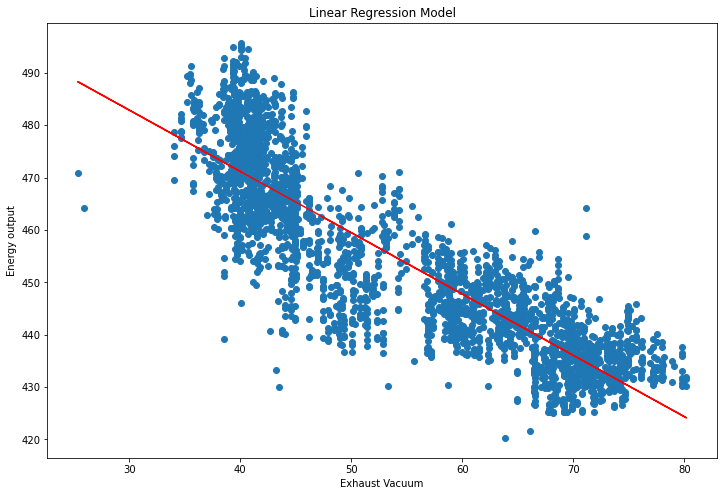

In [5]:
plt.figure(figsize=(12, 8))

plt.scatter(X_test.reshape(-1,1), y_test)

plt.plot(X_test.reshape(-1,1), y_pred, c='red')

plt.title('Linear Regression Model')

plt.xlabel('Exhaust Vacuum')

plt.ylabel('Energy output')

plt.show()

### Results - Evaluating model

In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rsq = r2_score(y_test, y_pred)

print('RMSE:', rmse)

print('\nR Square:', rsq)

RMSE: 8.433390200168125

R Square: 0.7548556708235812


# Model - Support Vector Regression

### Standardizing the data

In [7]:
std_scaler = StandardScaler()

std_scaler.fit(X_train.reshape(-1,1))

X_train_std = std_scaler.transform(X_train.reshape(-1,1))
X_test_std = std_scaler.transform(X_test.reshape(-1,1))

### SVR

In [8]:
svr = SVR(kernel='rbf', C=1.0, epsilon=1)

svr.fit(X_train_std, y_train)

y_pred = svr.predict(X_test_std)

### Results - Visualizing model

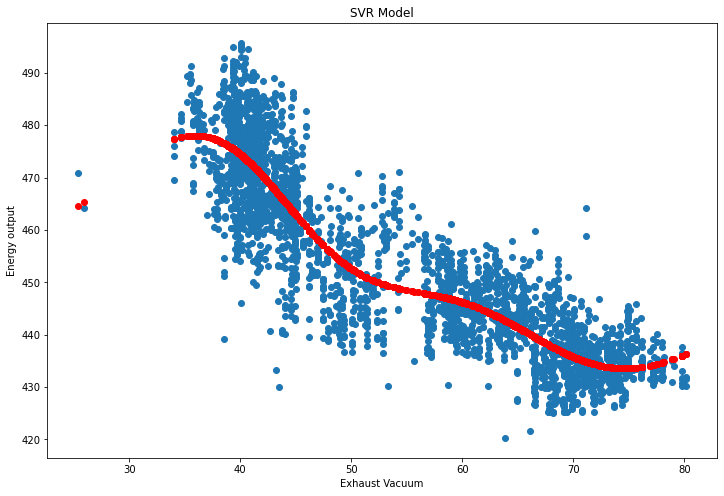

In [9]:
plt.figure(figsize=(12, 8))

plt.scatter(X_test.reshape(-1,1), y_test)

plt.scatter(X_test.reshape(-1,1), y_pred, color='red')

plt.title('SVR Model')

plt.xlabel('Exhaust Vacuum')

plt.ylabel('Energy output')

plt.show()

### Results - Evaluating model

In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rsq = r2_score(y_test, y_pred)

print('RMSE:', rmse)

print('\nR Square:', rsq)

RMSE: 7.737637454924349

R Square: 0.7936358677325247
